In [12]:
!nvidia-smi

Wed Jan 17 07:56:03 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   64C    P0              32W /  70W |    453MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [13]:
import os
HOME = os.getcwd()
print(HOME)

/content/datasets


In [15]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 27.3/78.2 GB disk)


In [16]:
from ultralytics import YOLO

from IPython.display import display, Image

In [17]:
%cd {HOME}
!yolo task=segment mode=predict model=yolov8s-seg.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=true

/content/datasets
100% 22.8M/22.8M [00:00<00:00, 170MB/s]
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11810560 parameters, 0 gradients, 42.6 GFLOPs

100% 104k/104k [00:00<00:00, 89.1MB/s]
image 1/1 /content/datasets/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 1 backpack, 1 handbag, 134.0ms
Speed: 2.4ms preprocess, 134.0ms inference, 516.9ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/segment/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


/content/datasets


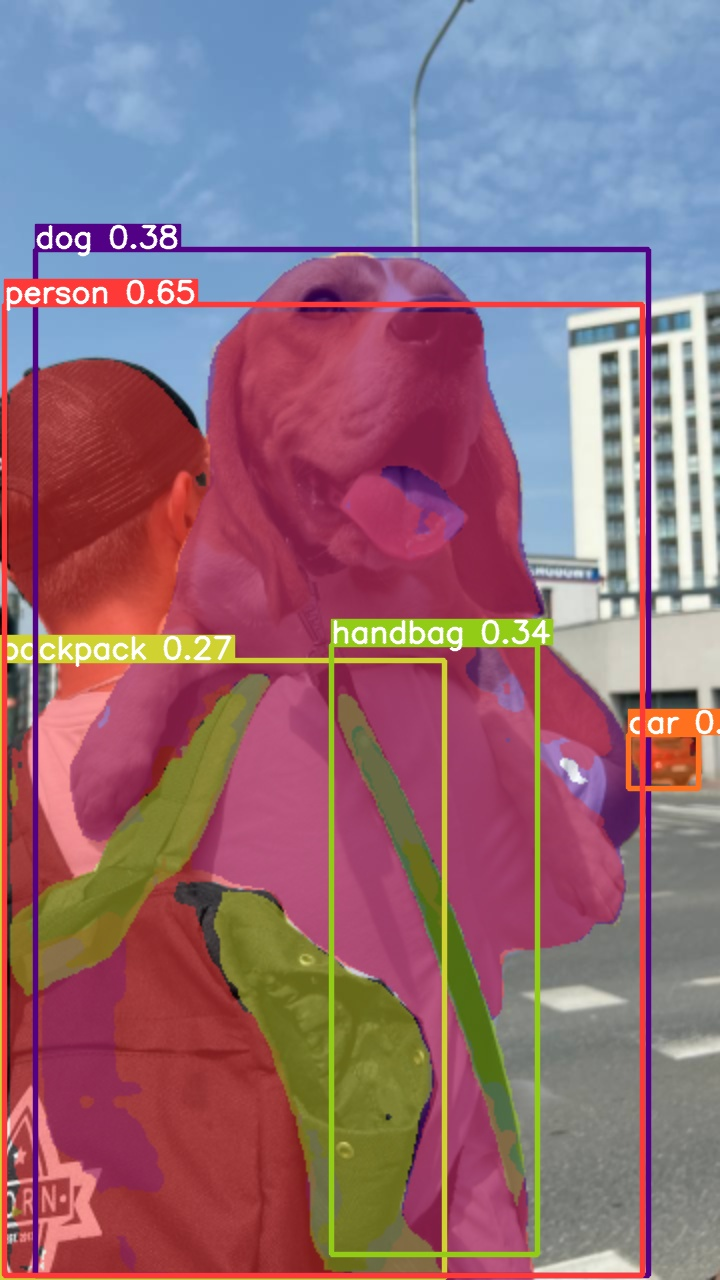

In [18]:
%cd {HOME}
Image(filename='runs/segment/predict/dog.jpeg', height=600)

In [19]:
model = YOLO(f'{HOME}/yolov8s-seg.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)


Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
image 1/1 /content/datasets/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 1 backpack, 1 handbag, 14.8ms
Speed: 2.0ms preprocess, 14.8ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 384)


In [20]:
results[0].boxes.xyxy

tensor([[4.4446e+00, 3.0434e+02, 6.4261e+02, 1.2755e+03],
        [6.2834e+02, 7.3451e+02, 6.9819e+02, 7.8832e+02],
        [3.5369e+01, 2.4992e+02, 6.4884e+02, 1.2759e+03],
        [3.3150e+02, 6.4431e+02, 5.3794e+02, 1.2545e+03],
        [8.8925e-01, 6.6045e+02, 4.4417e+02, 1.2785e+03]], device='cuda:0')

In [21]:
results[0].boxes.conf

tensor([0.6489, 0.5239, 0.3784, 0.3442, 0.2668], device='cuda:0')

In [22]:
results[0].boxes.cls

tensor([ 0.,  2., 16., 26., 24.], device='cuda:0')

In [23]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="43FVAezJ6osog3dv6Khi")
project = rf.workspace("prem-gowtham").project("waste-detection-mitigation-qtekz")
dataset = project.version(1).download("yolov8")


/content/datasets/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to waste-detection-&-mitigation-1 in yolov8:: 100%|██████████| 24022/24022 [00:05<00:00, 4238.53it/s]


In [24]:
%cd {HOME}

!yolo task=segment mode=train model=yolov8s-seg.pt data = "/content/datasets/waste-detection-&-mitigation-1/data.yaml" epochs=40 imgsz=250

/content/datasets
New https://pypi.org/project/ultralytics/8.1.2 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=/content/datasets/waste-detection-&-mitigation-1/data.yaml, epochs=40, patience=50, batch=16, imgsz=250, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False

In [25]:
!ls {HOME}/runs/segment/train/

args.yaml					    MaskF1_curve.png	  train_batch20582.jpg
BoxF1_curve.png					    MaskP_curve.png	  train_batch2.jpg
BoxP_curve.png					    MaskPR_curve.png	  val_batch0_labels.jpg
BoxPR_curve.png					    MaskR_curve.png	  val_batch0_pred.jpg
BoxR_curve.png					    results.csv		  val_batch1_labels.jpg
confusion_matrix_normalized.png			    results.png		  val_batch1_pred.jpg
confusion_matrix.png				    train_batch0.jpg	  val_batch2_labels.jpg
events.out.tfevents.1705478324.d9a9a069247e.3390.0  train_batch1.jpg	  val_batch2_pred.jpg
labels_correlogram.jpg				    train_batch20580.jpg  weights
labels.jpg					    train_batch20581.jpg


In [26]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="43FVAezJ6osog3dv6Khi")
project = rf.workspace("prem-gowtham").project("waste-detection-mitigation-qtekz")
dataset = project.version(1).download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to waste-detection-&-mitigation-1 in yolov8:: 100%|██████████| 24022/24022 [00:06<00:00, 3860.74it/s]


/content/datasets


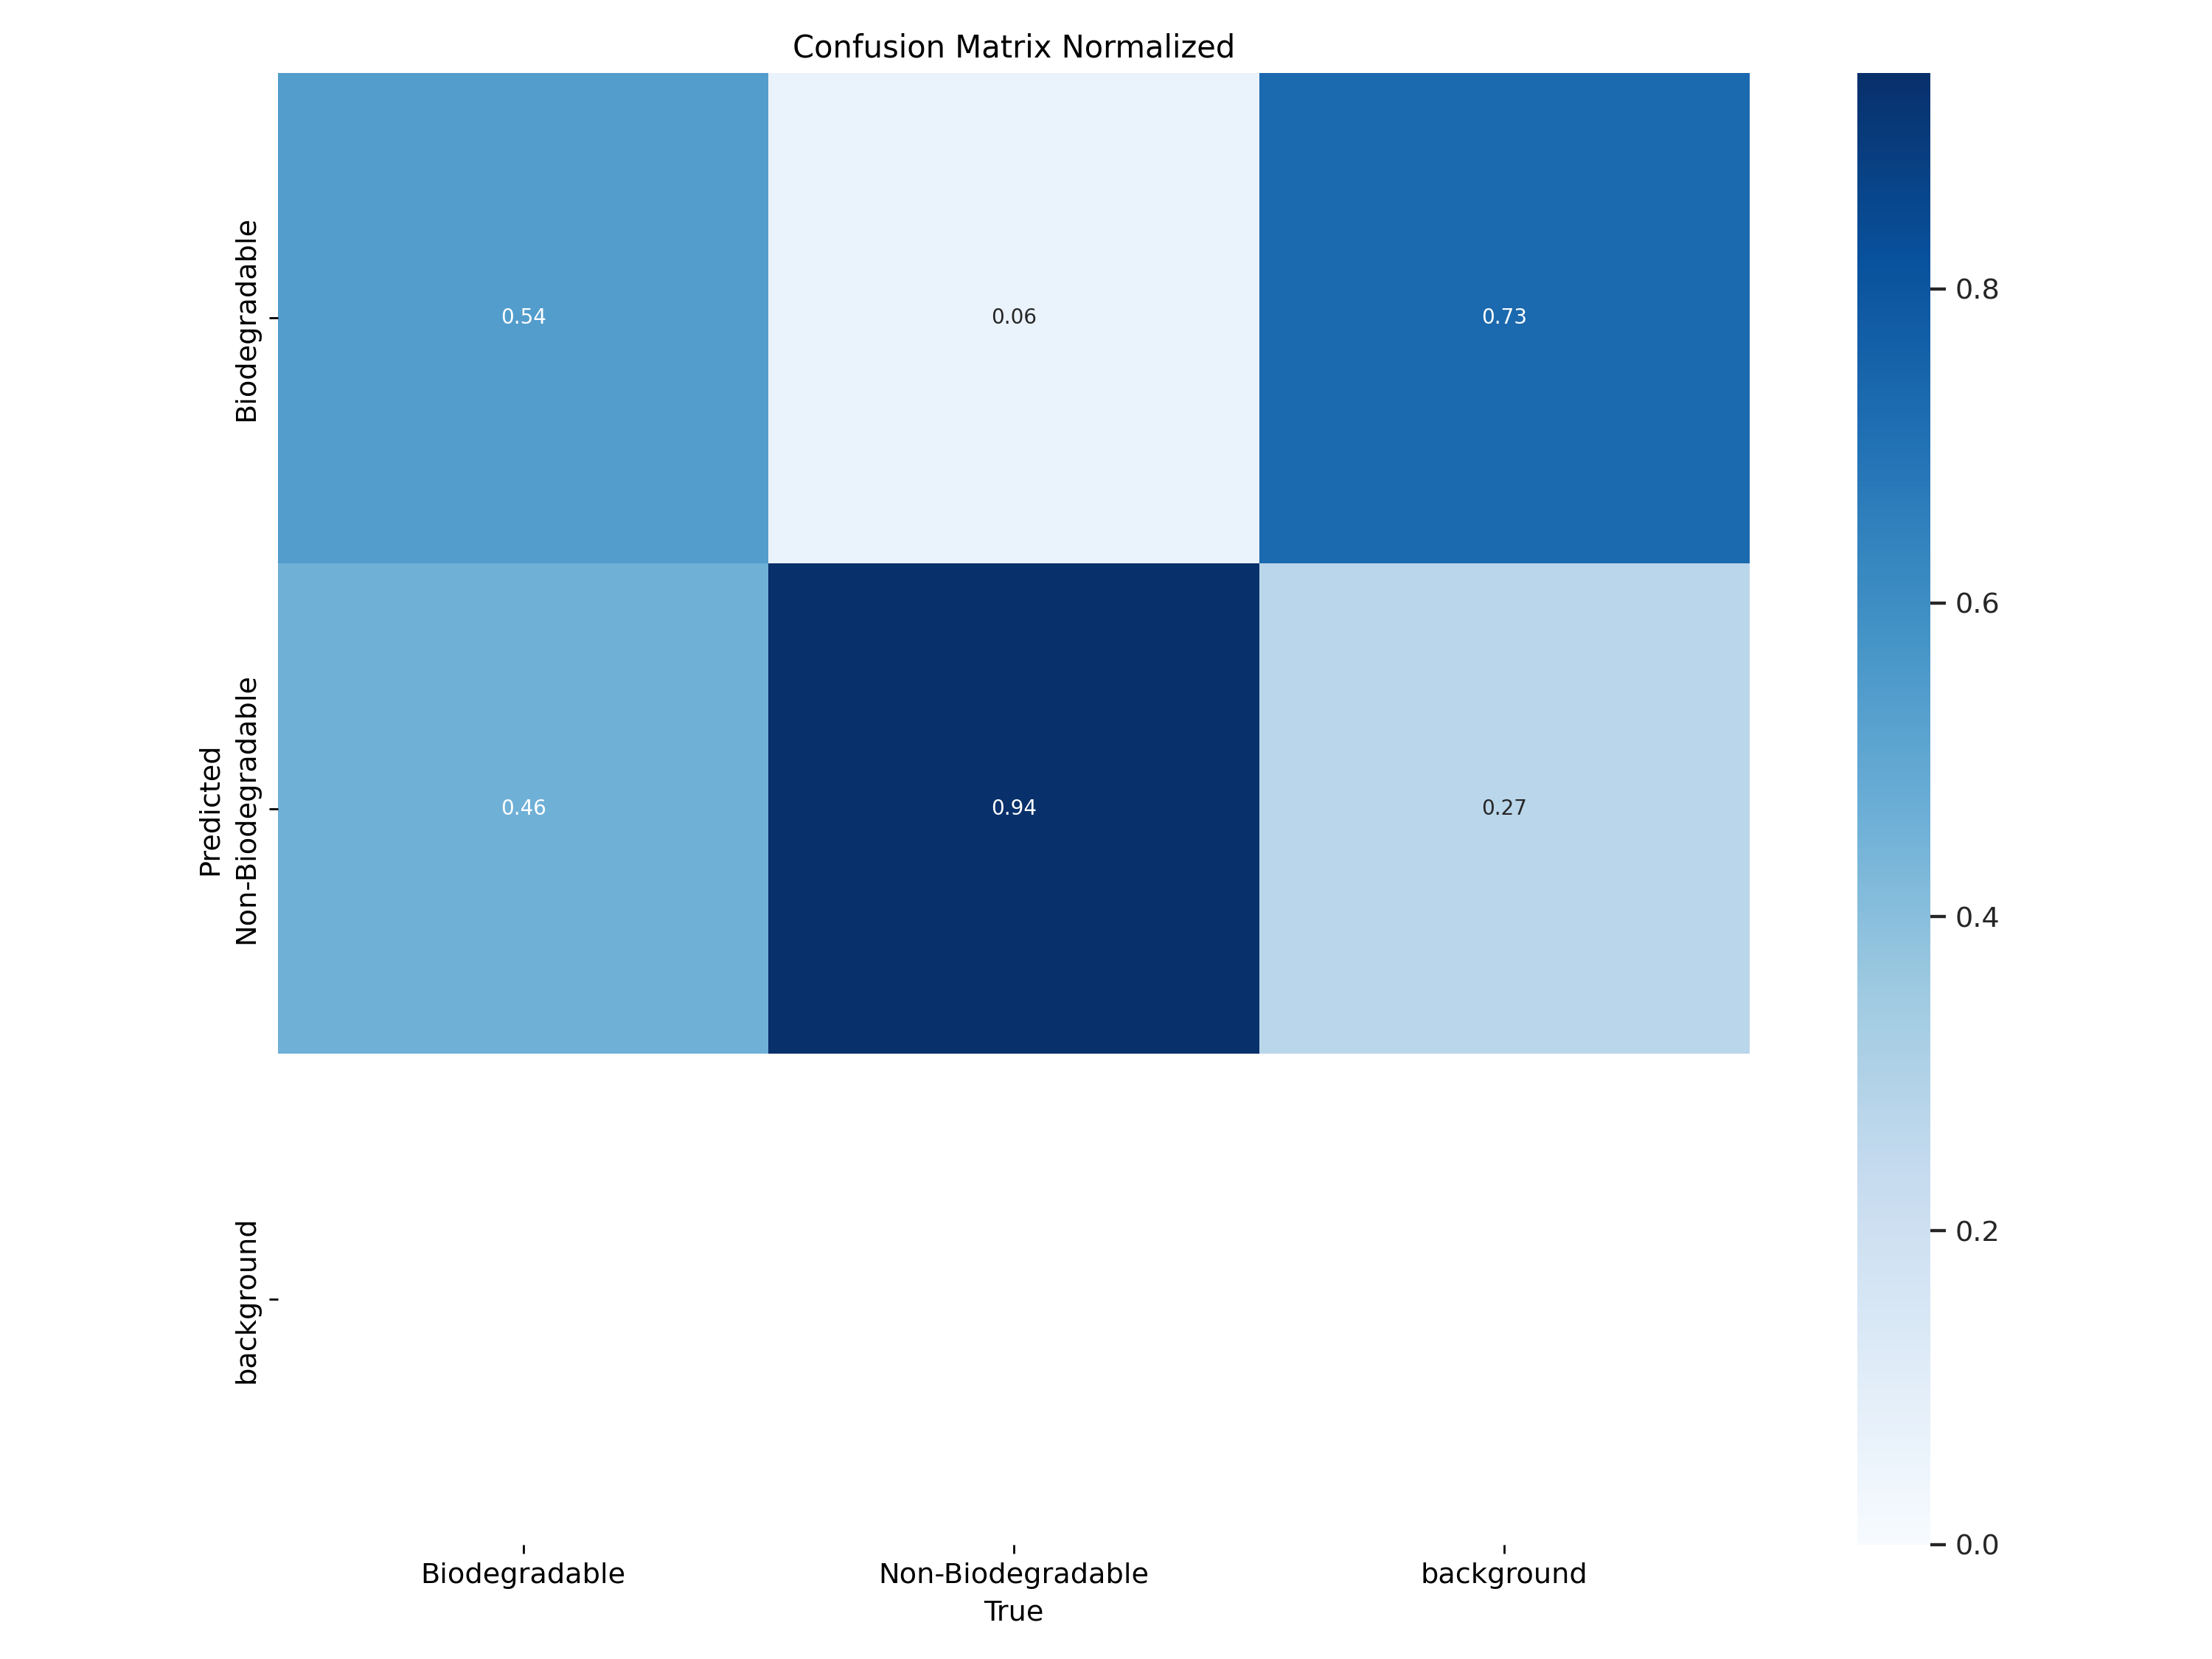

In [42]:
%cd {HOME}
Image(filename=f'/content/datasets/runs/segment/train/confusion_matrix_normalized.png', width=600)

/content/datasets


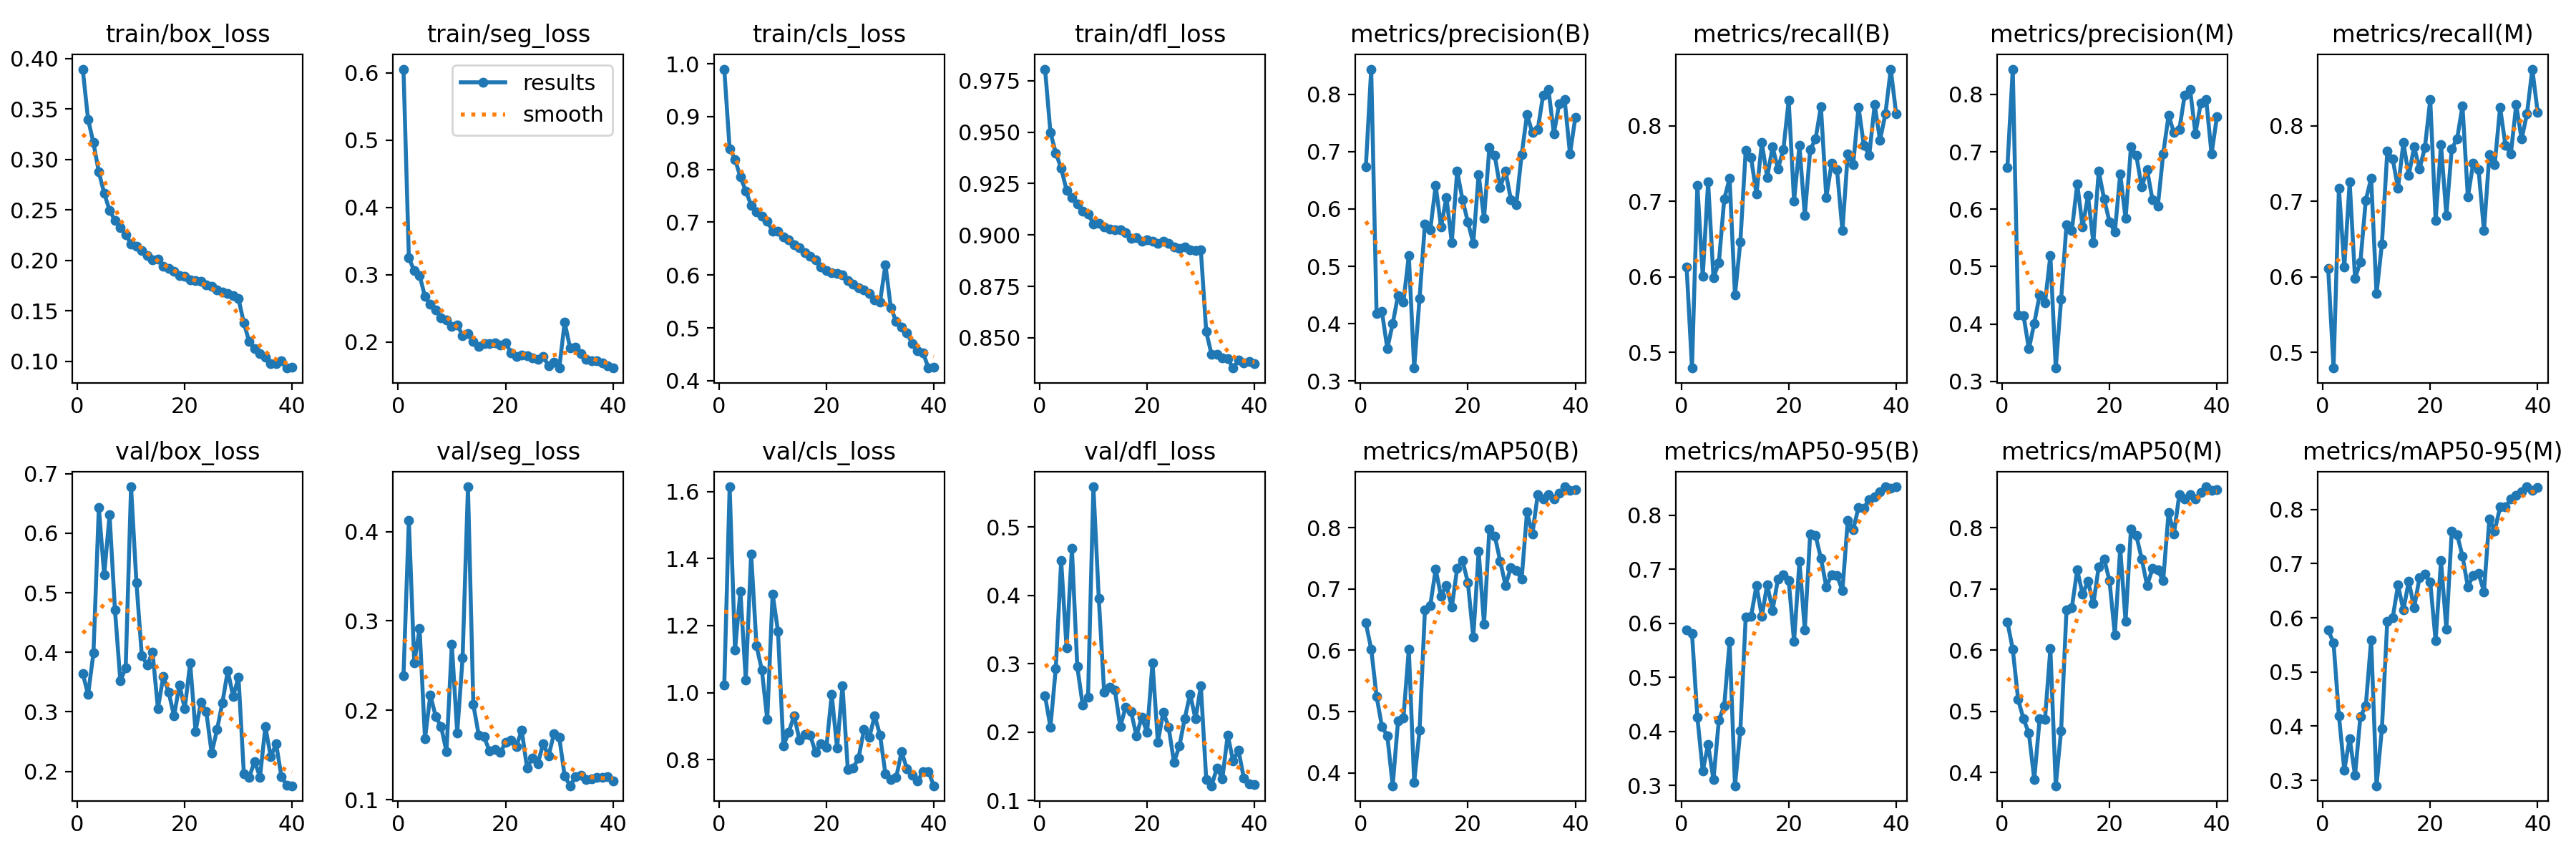

In [36]:
%cd {HOME}
Image(filename=f'/content/datasets/runs/segment/train/results.png', width=600)

/content/datasets


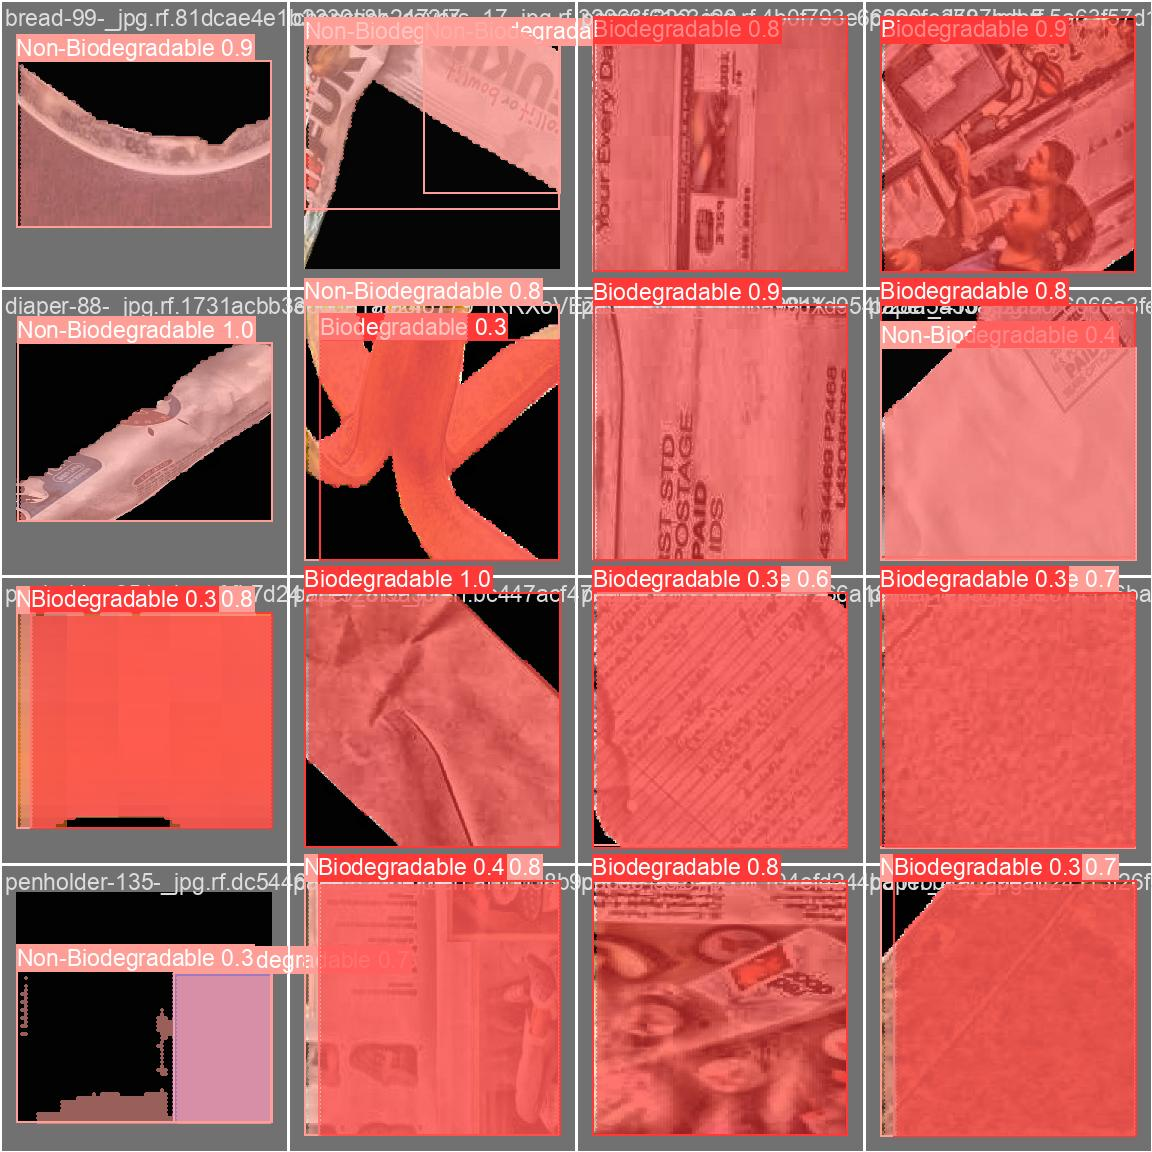

In [44]:
%cd {HOME}
Image(filename=f'/content/datasets/runs/segment/train/val_batch0_pred.jpg', width=600)

In [ ]:
## best fit model

In [40]:
%cd {HOME}

!yolo task=segment mode=val model= "/content/datasets/runs/segment/train/weights/best.pt" data="/content/datasets/waste-detection-&-mitigation-1/data.yaml"

/content/datasets
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11780374 parameters, 0 gradients, 42.4 GFLOPs
val: Scanning /content/datasets/waste-detection-&-mitigation-1/valid/labels.cache... 521 images, 0 backgrounds, 0 corrupt: 100% 521/521 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 33/33 [00:09<00:00,  3.39it/s]
                   all        521        521      0.792      0.816      0.867      0.853      0.792      0.816      0.867      0.841
         Biodegradable        521        152      0.753      0.661      0.789      0.767      0.753      0.661      0.789      0.755
     Non-Biodegradable        521        369      0.831      0.971      0.944      0.938      0.831      0.971      0.944      0.928
Speed: 0.3ms preprocess, 4.0ms inference, 0.0ms loss, 2.8ms postprocess per image
Res